In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math
from scipy.stats import spearmanr #to compute spearman correlation
from scipy.stats import pearsonr #to compute pearson correlation
from scipy.stats import kendalltau #to compute kendall tau correlation

In [2]:
data_folder = './Data/' # all my data is in one folder 
path_sources_final='sources_final.csv'
path_control_grp='sources_1.csv'
path_df1='df_1.csv'
path_df2='df_2.csv'

In [3]:
#getting our necessary datasets
df_sources_final=pd.read_csv(data_folder + path_sources_final) #maps channel_id to extreme grp corresponding
df_1=pd.read_csv(data_folder + path_df1)
df_2=pd.read_csv(data_folder + path_df2)

In [4]:
#combining the two dataframes from the two folders 
#(should do it right from the begining? I was afraid it would slow things to have a dataframe so big)
df=pd.concat([df_1, df_2],ignore_index=True)

In [5]:
#extracting only necessary columns
df_sources=df_sources_final[["Category", "Id"]]
df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)

C:\Users\anyam\AppData\Local\Temp\ipykernel_22108\2487438044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sources.rename(columns = {'Id':'channel_id'}, inplace = True)


In [6]:
df_sources.head()

,Category,channel_id
0,Alt-lite,UCfDdlNLRVb1h3_7Xh-WhL3w
1,Alt-lite,UCso6oQ3qy7z61Fr8b0WNBMw
2,Alt-lite,UCplXdu0g94UynzYCmO2zOjw
3,Alt-lite,UCl3RCEtooHD5bhPCHJw3btA
4,Alt-lite,UCbukZErY9SjdGTHabMzY7qg


In [7]:
#checking for NaN values
print("there are", len(df_sources[df_sources.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [8]:
df.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g


In [9]:
#checking for NaN values
print("there are", len(df[df.isnull().any(axis=1)]), "Nan values")

there are 0 Nan values


In [10]:
#we have more channels in df than in df_sources but the difference is small

In [11]:
df_final=df.merge(df_sources, how='left', on='channel_id')
df_final.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id,Category
0,0,0,977.0,20170920,0.136365,0.001002,0.051841,0.006676,0.056322,0.000422,0.072277,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
1,1,1,408.0,20170905,0.014895,0.000007,0.000330,0.000946,0.000885,0.002700,0.000118,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
2,2,2,523.0,20170828,0.034177,0.000006,0.000391,0.000210,0.017617,0.000103,0.000400,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
3,3,3,1446.0,20170628,0.073253,0.000177,0.039672,0.005961,0.020233,0.002046,0.000521,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA
4,4,4,1859.0,20170531,0.108773,0.008326,0.049040,0.025089,0.033552,0.019227,0.009504,UC_7Bt0vnvdJqAwF8Ow8iT0g,MRA


In [12]:
#overwriting the category for the channels belonging to the control group
df_control_=pd.read_csv(data_folder + path_control_grp) #maps channel_id to extreme grp corresponding

In [13]:
#list of channels belonging to control grp
list_control_=(df_control_[df_control_["Data Collection step"]=='control'].Id).tolist()

In [14]:
df_final.loc[df_final["channel_id"].isin(list_control_), "Category"] = 'Control'

In [15]:
#checking for NaN values
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 1998 Nan values which corresponds to 0.3853698335271755 % of the dataframe


In [16]:
df_final.dropna(inplace=True)
nb_Nan=len(df_final[df_final.isnull().any(axis=1)])
print("there are", nb_Nan, "Nan values which corresponds to", nb_Nan*100/len(df_final), "% of the dataframe")

there are 0 Nan values which corresponds to 0.0 % of the dataframe


In [17]:
# correct the duplicated category
df_final.loc[df_final.Category == 'PUA ', 'Category'] = 'PUA'

#Notice None means "not associated to anything" and not "Nan" 
df_final.Category.value_counts()

Control                  332815
Alt-lite                  63667
Intellectual Dark Web     34252
PUA                       27717
MGTOW                     19932
NONE                      14793
Alt-right                 14208
MRA                        5613
Incel                      3468
Name: Category, dtype: int64

In [18]:
#MGTOW men going their own way, anti feminist misogynistic politic group

#MRA men's rights activist (again anti feminist)

#Incel a member of an online community of young men who consider themselves unable to attract women sexually, 
#typically associated with views that are hostile towards women and men who are sexually active:

#Pick up : online community sharing tips on how to pick up women

In [19]:
# Some lists
# selection of channel categories
list_categories = ['Alt-lite', 'Alt-right', 'Intellectual Dark Web', 'Control']
# subcategories of toxicity
list_subcat_tox = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']
list_subcat_tox_titles = ['Severe toxicity', 'Obscene', 'Identity attack', 'Insult', 'Threat', 'Sexual explicit']
# all categories of toxicity
list_all_tox = ['toxicity'] + list_subcat_tox
list_all_tox_titles = ['Toxicity'] + list_subcat_tox_titles

### Let's start our analysis

Now that we have our dataframe and all the values we want we can start our analysis. 
We're keeping only Alt-lite, Alt-right, Intellectual Dark Web channels and control channels. 

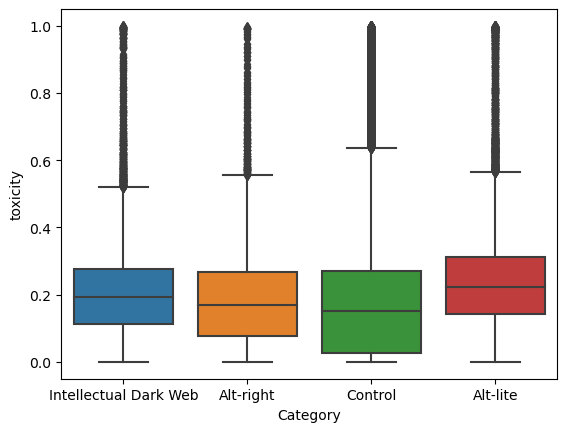

In [20]:
#getting some basic information 
df_extreme=df_final.loc[df_final['Category'].isin(list_categories)]
ax = sns.boxplot(x="Category", y="toxicity", data=df_extreme)

Text(0, 0.6, 'Nb videos')

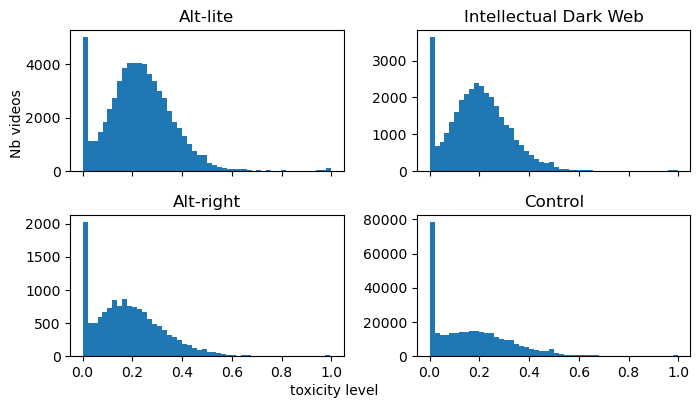

In [21]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = True) #chose sharey=False as we are interested 
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    sbplt.hist(df['toxicity'].values, bins = 50)
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "toxicity level")
fig.text(0,0.6, "Nb videos", rotation = 90)

**Discussion:** We see they all have a peak at 0 (the first bin), all are left skewed they all seem to have their peak (other than the one at 0) around 0.2.

That means that although they are extreme groups, the model detoxify doesn't recognize the comments being made as toxic

## Are toxicity scores and popularity correlated?

Recall that we define the popularity of a video/channel by its number of views. 

In [22]:
#we will do it among extreme groups, else we would need to normalize??? Maybe that would've been best? 

Text(0, 0.6, 'view_count')

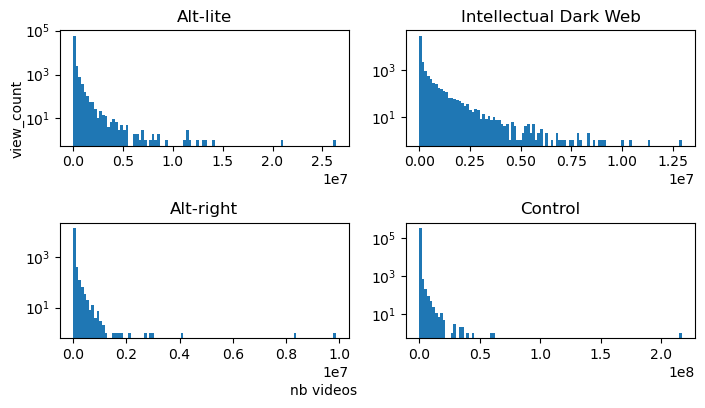

In [23]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = False) #chose sharey=False and sharex=False 
#as we are interested the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log')
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    sbplt.hist(df['view_count'].values, bins = 100)
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "nb videos")
fig.text(0,0.6, "view_count", rotation = 90)

We notice that the distribution is right-skewed. We take that in account when computing by creating the column "log_view_count", which is the log of the column "view_count". 

In [24]:
df_extreme['log_view_count'] = np.log(df_extreme['view_count'])

c:\Users\anyam\.conda\envs\ada\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anyam\AppData\Local\Temp\ipykernel_22108\505447346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extreme['log_view_count'] = np.log(df_extreme['view_count'])


In [25]:
## TAKES A FEW MINUTES to plot 
"""
for i, category in enumerate(list_categories):
        df=df_extreme.loc[df_extreme['Category']==category]
        p = sns.jointplot(x='toxicity', y='log_view_count', data = df, kind='hex')
        p.fig.suptitle(category)
        p.ax_marg_x.remove()
        #p.ax_marg_y.remove()
        # """

"\nfor i, category in enumerate(list_categories):\n        df=df_extreme.loc[df_extreme['Category']==category]\n        p = sns.jointplot(x='toxicity', y='log_view_count', data = df, kind='hex')\n        p.fig.suptitle(category)\n        p.ax_marg_x.remove()\n        #p.ax_marg_y.remove()\n        # "

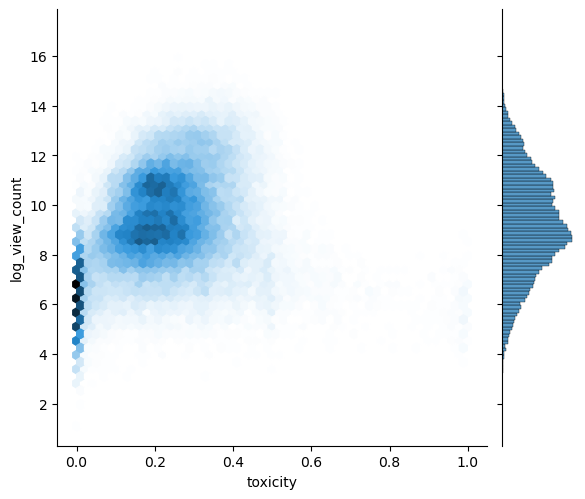

In [26]:
# to delete later, just so that we see what the cell above is doing.
df=df_extreme.loc[df_extreme['Category']==list_categories[0]]
g = sns.jointplot(x='toxicity', y='log_view_count', data = df, kind='hex')
g.ax_marg_x.remove()

In [27]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

for i in list_categories:
    df=df_extreme.loc[df_extreme['Category']==i]
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Alt-lite
spearman correlation coefficient is equal to 0.285 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.101 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.203 with an associated p-value of 0.0
Alt-right
spearman correlation coefficient is equal to 0.204 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.068 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.138 with an associated p-value of 0.0
Intellectual Dark Web
spearman correlation coefficient is equal to 0.272 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.077 with an associated p-value of 0.0
kendall tau correlation coefficient is equal to 0.194 with an associated p-value of 0.0
Control
spearman correlation coefficient is equal to 0.173 with an associated p-value of 0.0
pearson correlation coefficient is equal to -0.008 with an associated p-value of 0.0
kendall ta

### Only the top 25
view_count has a very skewed distribution, so the correlation that we get might be biased by the fact most videos have view_count 0. Therefore, we're studying the toxicity of the 25 most popular videos per community

Text(0, 0.4, 'toxicity level')

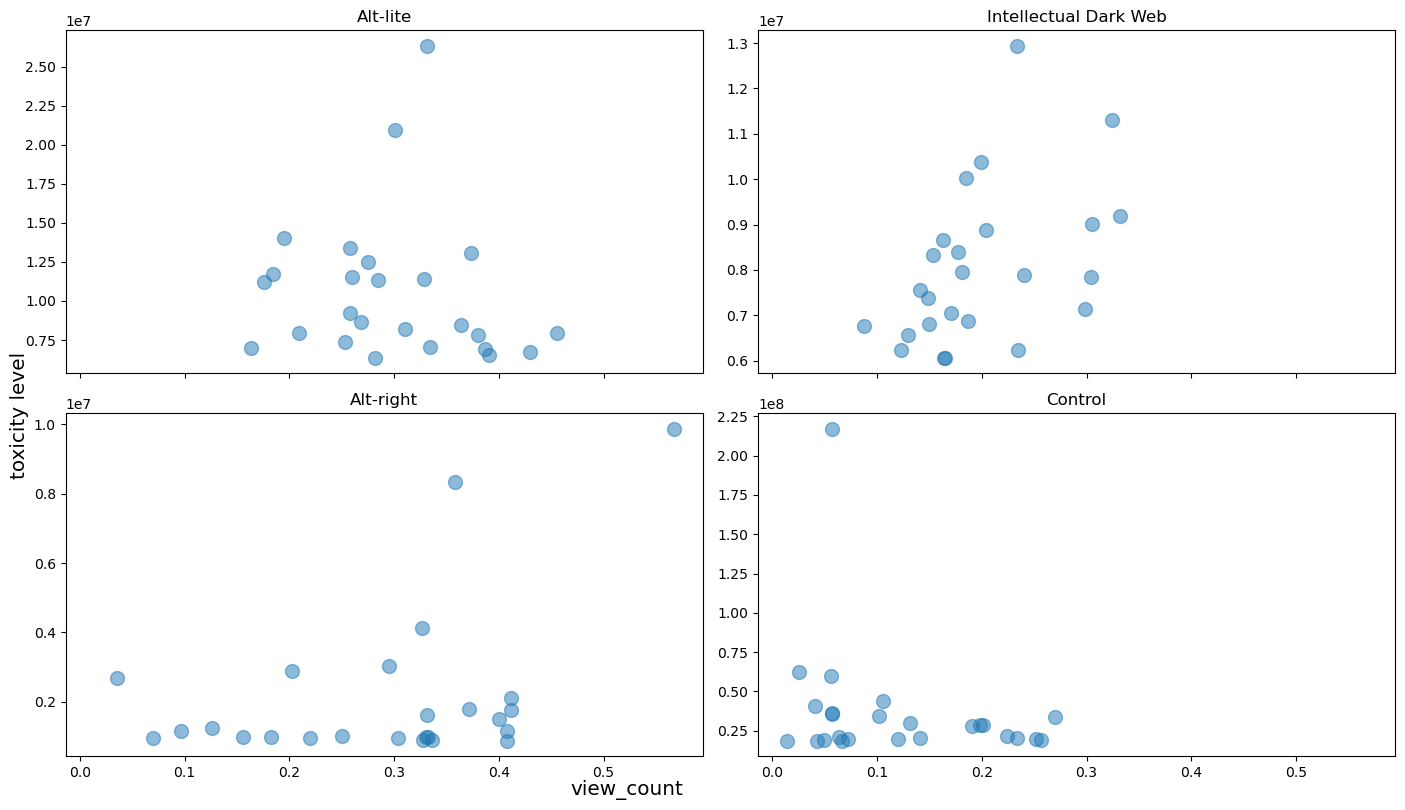

In [28]:
#checking correlation and scatter plot only for top 25 videos per category

#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    df=df_extreme.loc[df_extreme['Category']==list_categories[i]]
    df=df.sort_values('view_count', ascending=False).head(25)
    sbplt.scatter(df['toxicity'], df['view_count'], s = 100, alpha=0.5)
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count", fontsize='x-large')
fig.text(0,0.4, "toxicity level", rotation = 90, fontsize='x-large')

In [29]:
for i in list_categories:
    df=df_extreme.loc[df_extreme['Category']==i]
    df=df.sort_values('view_count', ascending=False).head(25)
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['view_count'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['view_count'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['view_count'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Alt-lite
spearman correlation coefficient is equal to -0.291 with an associated p-value of 0.159
pearson correlation coefficient is equal to -0.124 with an associated p-value of 0.556
kendall tau correlation coefficient is equal to -0.193 with an associated p-value of 0.185
Alt-right
spearman correlation coefficient is equal to 0.201 with an associated p-value of 0.336
pearson correlation coefficient is equal to 0.403 with an associated p-value of 0.046
kendall tau correlation coefficient is equal to 0.14 with an associated p-value of 0.342
Intellectual Dark Web
spearman correlation coefficient is equal to 0.548 with an associated p-value of 0.005
pearson correlation coefficient is equal to 0.458 with an associated p-value of 0.021
kendall tau correlation coefficient is equal to 0.4 with an associated p-value of 0.005
Control
spearman correlation coefficient is equal to -0.152 with an associated p-value of 0.47
pearson correlation coefficient is equal to -0.244 with an associated p-val

Although there is a correlation the toxicity value rarely exceeds 0.5 especially when you compare to the control group it's not obvious 

## With channels instead of videos ! 

In [30]:
#extracting channel_id and community it belongs to 
path_channel='rec_base.jsonl' #channel dataset
df_channel = pd.read_json(data_folder + path_channel, lines=True)

In [31]:
list_view=[]
for i in range(len(df_channel)):
    s=df_channel.loc[i,"statistics"]['viewCount']
    list_view.append(float(s)) #in the dictionary it was stored as a string

In [32]:
df_channel["channel_viewcount"]=list_view
df_channel=df_channel.drop(columns=["name", "edges", "description", "statistics"]) #only necessary columns

In [33]:
#merge with the community data
df_channel_count=df_extreme[["channel_id", "Category", "toxicity"]].merge(df_channel, how='inner', on='channel_id')

In [34]:
#group by everything and take the mean of the toxicity
df_channel_count=df_channel_count.groupby(by=["channel_id", "Category", "channel_viewcount"]).mean()
df_channel_count.reset_index(inplace=True)

In [35]:
df_channel_count.head()

,channel_id,Category,channel_viewcount,toxicity
0,UC-6OW5aJYBFM33zXQlBKPNA,Control,240284799.0,0.109187
1,UC-JblcinswY50lrUdSaRNEg,Control,127997360.0,0.152515
2,UC-c75h4LnBiLziZw0nzDm9w,Intellectual Dark Web,17184306.0,0.290251
3,UC-jlxuVAVEl2PXTaGno7gSA,Alt-lite,92121073.0,0.389389
4,UC-uP8fChoXf3FTHyttRRkUw,Intellectual Dark Web,858187.0,0.128199


In [36]:
channel_list=df_channel_count.channel_id.tolist()

In [37]:
channel_list

['UC-6OW5aJYBFM33zXQlBKPNA',
 'UC-JblcinswY50lrUdSaRNEg',
 'UC-c75h4LnBiLziZw0nzDm9w',
 'UC-jlxuVAVEl2PXTaGno7gSA',
 'UC-uP8fChoXf3FTHyttRRkUw',
 'UC-yewGHQbNFpDrGM0diZOLA',
 'UC0aVoboXBUx2-tVIWHc3W2Q',
 'UC0b-vEnPRxtkMJj7xxDnJIA',
 'UC0h-sR-xyYLX7sSO46ovo2A',
 'UC0p5jTq6Xx_DosDFxVXnWaQ',
 'UC0rZoXAD5lxgBHMsjrGwWWQ',
 'UC0uVZd8N7FfIZnPu0y7o95A',
 'UC16niRr50-MSBwiO3YDb3RA',
 'UC1B82kNwoGlRwcFt3xWa6Rg',
 'UC1yBKRuGpC1tSM73A0ZjYjQ',
 'UC26rydyZRPAr51aJ2k9QHTQ',
 'UC2AopvAmRGD2rGjG6PK97Hg',
 'UC2JVrseRgh0ccDQ7c8qnXTQ',
 'UC2LSaEGBHvAvNf9ufcJfk2w',
 'UC2TNY0ME37MkgM15RpORfIw',
 'UC2h3yPmh9TfQv2z3aTDTHHA',
 'UC2i_hx_UfauBFh5DA3YWfDg',
 'UC2nUwy3lWySoH2tWUiSeOgA',
 'UC2w1CQqPli4w94-PCg2UvJQ',
 'UC3C9u_BSiOCQQGI4pjey9dQ',
 'UC3EiomuXs-spYm7ZjAdHR6Q',
 'UC3FqYK9UCKtmcTwSYo7mwpw',
 'UC3eWseER6XOMR6RcwcIJ23A',
 'UC3yl-2o2mOPmsjgxDXTKbCA',
 'UC4-AGCUwX7C-D4BsBook9fQ',
 'UC4GzVIbK8bria6AOy43hY4Q',
 'UC4LADtN8xwppFydHUB1s5uA',
 'UC4WdIJ_D_lJb87uE3JV5SgQ',
 'UC5AQEUAwCh1sGDvkQtkDWUQ',
 'UC5bEfSFTYQV

In [38]:
len(df_channel_count)

377

Text(0, 0.6, 'view_count')

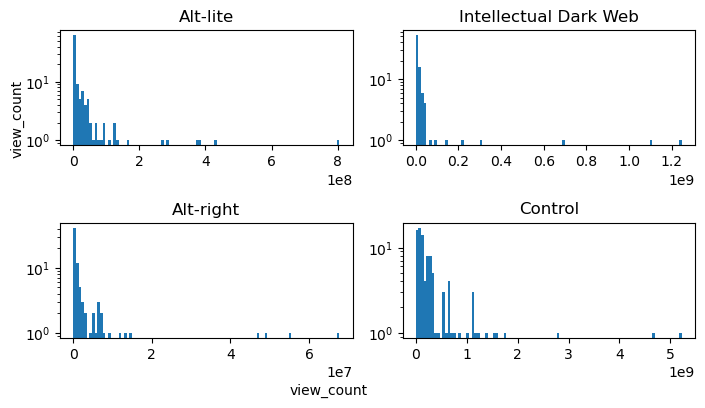

In [39]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (7,4), sharey = False, sharex = False) #chose sharey=False and sharex=False 
#as we are interested the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log')
    df=df_channel_count.loc[df_channel_count['Category']==list_categories[i]]
    sbplt.hist(df['channel_viewcount'].values, bins = 100)
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count")
fig.text(0,0.6, "view_count", rotation = 90)

Text(0, 0.4, 'toxicity level')

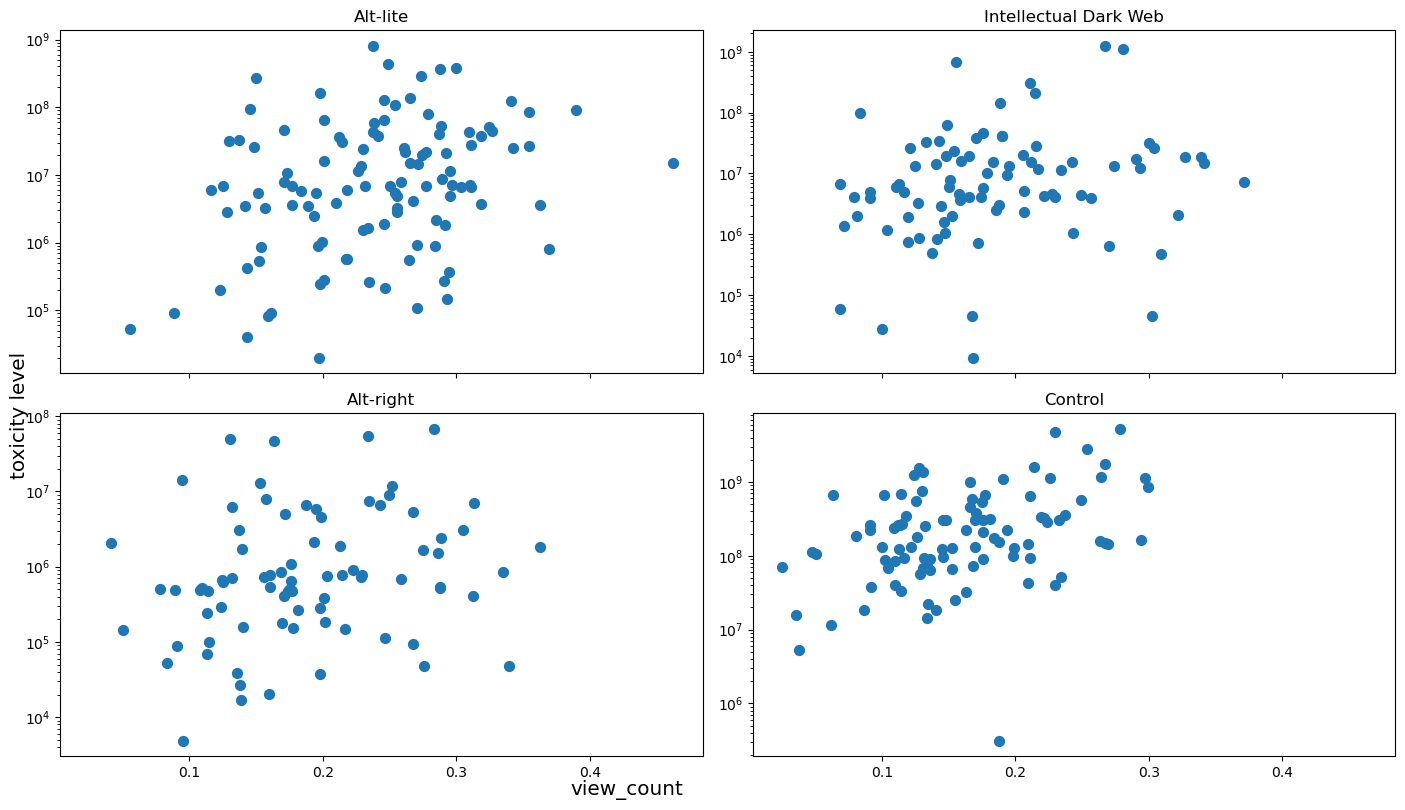

In [40]:
#define an histogram for the distribution 
fig, ax = plt.subplots(2,2,figsize= (14,8), sharey = False, sharex = True) #chose sharey=False as we are interested in
#the distribution, not the exact values

for i in range(4):
    sbplt = ax[i%2, math.floor(i/2)]
    ax[i%2, math.floor(i/2)].set_yscale('log') #plot the y axis in logarithm 
    df=df_channel_count.loc[df_channel_count['Category']==list_categories[i]]
    sbplt.scatter(df['toxicity'], df['channel_viewcount'], s = 50, alpha=1)
    sbplt.set_title(list_categories[i])
    
fig.tight_layout()

fig.text(0.4,0, "view_count", fontsize='x-large')
fig.text(0,0.4, "toxicity level", rotation = 90, fontsize='x-large')

In [41]:
#Spearman's correlation, how well can the data be approcimated by a monotonic function
#Pearson's correlation, how well can the data be approximated by a linear function
#Kendall Tau'correlation, how well can the data be approximated in terms of "coherant pairs" (ex: a lot of data in the top right 
#a lot in the bottom left, and none elsewhere)

for i in list_categories:
    df=df_channel_count.loc[df_channel_count['Category']==i]
    print(i)
    rho_1, p_1=spearmanr(df['toxicity'], df['channel_viewcount'])
    print("spearman correlation coefficient is equal to", np.round(rho_1,3), "with an associated p-value of", np.round(p_1,3))
    rho_2, p_2=pearsonr(df['toxicity'], df['channel_viewcount'])
    print("pearson correlation coefficient is equal to", np.round(rho_2,3), "with an associated p-value of", np.round(p_2,3))
    rho_3, p_3=kendalltau(df['toxicity'], df['channel_viewcount'])
    print("kendall tau correlation coefficient is equal to", np.round(rho_3,3), "with an associated p-value of", np.round(p_3,3))

Alt-lite
spearman correlation coefficient is equal to 0.285 with an associated p-value of 0.002
pearson correlation coefficient is equal to 0.094 with an associated p-value of 0.325
kendall tau correlation coefficient is equal to 0.194 with an associated p-value of 0.002
Alt-right
spearman correlation coefficient is equal to 0.262 with an associated p-value of 0.018
pearson correlation coefficient is equal to 0.096 with an associated p-value of 0.395
kendall tau correlation coefficient is equal to 0.175 with an associated p-value of 0.021
Intellectual Dark Web
spearman correlation coefficient is equal to 0.243 with an associated p-value of 0.024
pearson correlation coefficient is equal to 0.167 with an associated p-value of 0.124
kendall tau correlation coefficient is equal to 0.161 with an associated p-value of 0.029
Control
spearman correlation coefficient is equal to 0.366 with an associated p-value of 0.0
pearson correlation coefficient is equal to 0.37 with an associated p-value o

## Analysis of toxicity level through time

In [42]:
# change the format of the upload date, and add a column of month created
df_extreme.upload_date = pd.to_datetime(df_extreme.upload_date, format='%Y%m%d')
df_extreme["month_created"] = df_extreme.upload_date.apply(lambda x: pd.to_datetime(x.strftime('%Y-%m')))

# all categories have data until April 2019. Therefore we consider only the data until then:
df_final_cat = df_extreme[df_extreme.upload_date < pd.to_datetime("2019-05")]

C:\Users\anyam\AppData\Local\Temp\ipykernel_22108\3834067498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extreme.upload_date = pd.to_datetime(df_extreme.upload_date, format='%Y%m%d')
C:\Users\anyam\AppData\Local\Temp\ipykernel_22108\3834067498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extreme["month_created"] = df_extreme.upload_date.apply(lambda x: pd.to_datetime(x.strftime('%Y-%m')))


## Number of comments per month
We see in the first graph below that the data is quite noisy before 2014. Then, we show that there is more content to study from 2014, which explains why the data is not stable before. Therefore, we will only study the toxicity level from 2014 until April 2019.

Text(0.5, 0, 'Month')

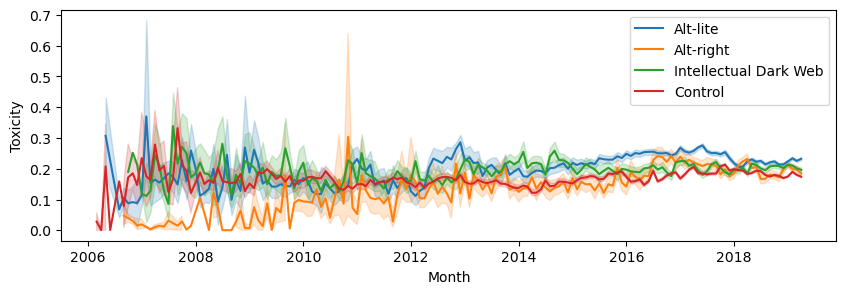

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))

for category in list_categories:
    sns.lineplot(x="month_created", y="toxicity", data=df_final_cat[df_final_cat['Category'] == category],
            label=category)
axs.set_ylabel("Toxicity")
axs.set_xlabel("Month")

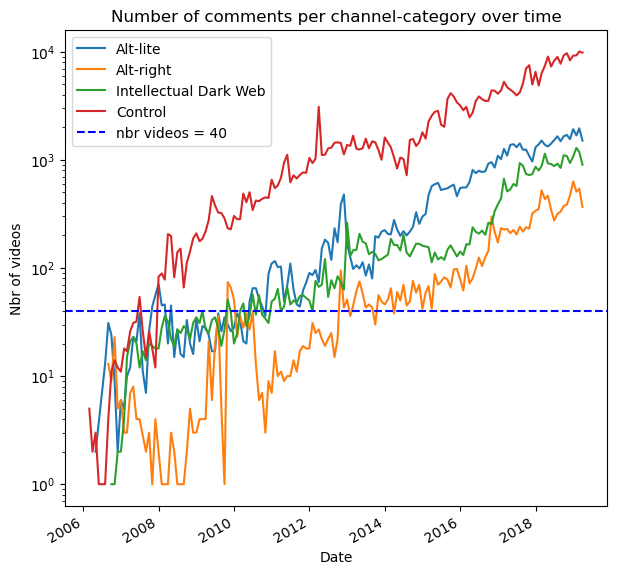

In [44]:
#plot number of commented videos per month per category: 
fig, axs = plt.subplots(1,1, figsize=(7,7), sharex=True)

for category in list_categories:
        df_final_cat.loc[df_final_cat['Category'] == category, 'month_created'].value_counts().plot(kind = 'line', ax=axs, logy=True)

axs.axhline(y=40, linestyle = '--', color='b')
axs.set_ylabel("Nbr of videos")
axs.set_xlabel("Date")
axs.set_title("Number of comments per channel-category over time")
axs.legend(list_categories + ['nbr videos = 40'])

From 2014, we have at least 40 comments per category per month (see horizontal line). We presume it is enough to make analysis on the overall toxicity of the comments. Therefore, from now on we will consider data from January 2014 until April 2019.

In [45]:
df_after2014 = df_final_cat[df_final_cat.upload_date >= pd.to_datetime("2014-01")]

## Analysis: each category of toxicity
In the period defined before, we compare the toxicity levels in between each channel-category.

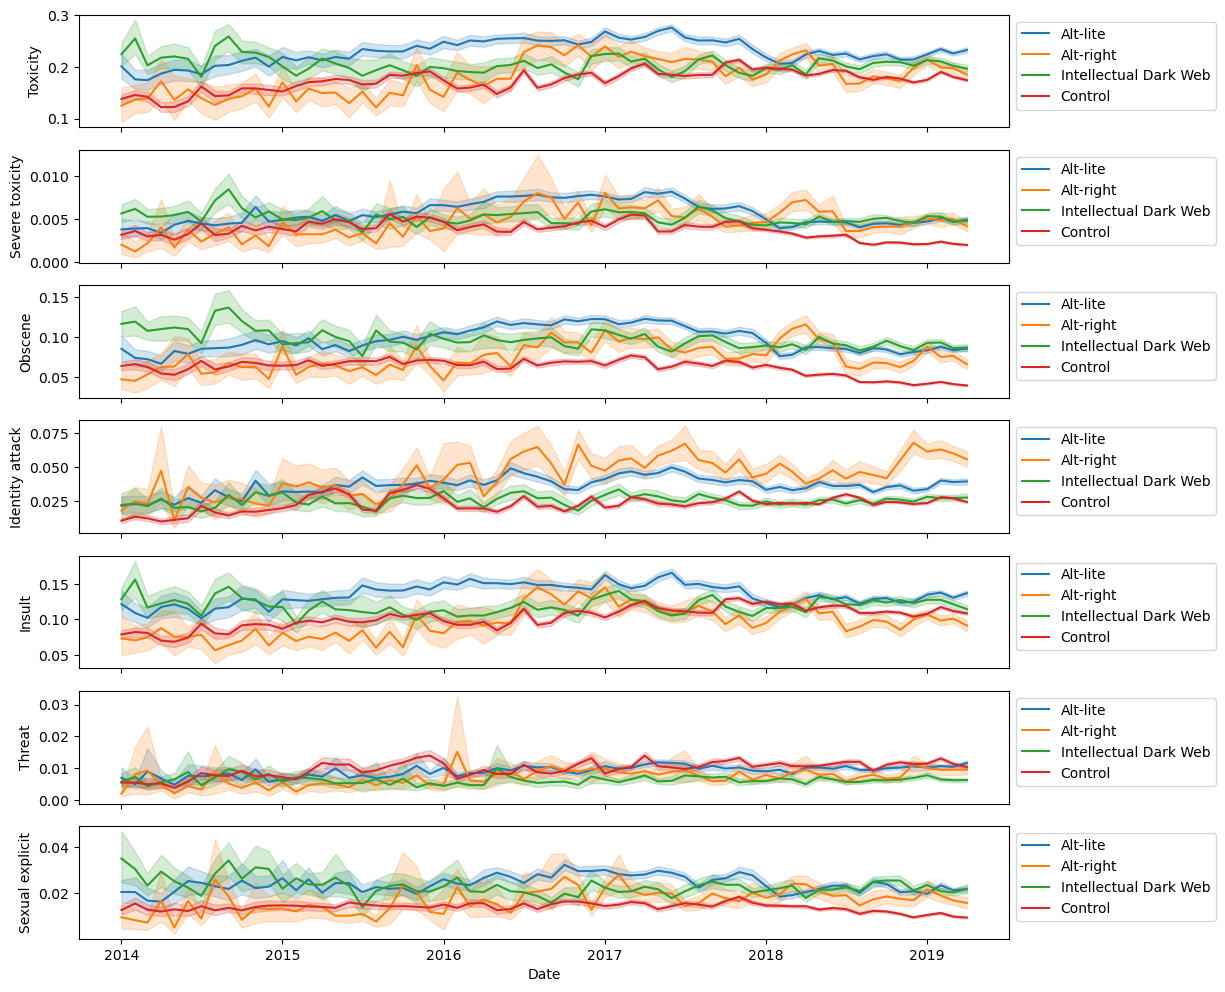

In [46]:
# prints the categories of toxicity over time. 
# takes about 45 sec to run

fig, axs = plt.subplots(7,1, figsize=(12,12), sharex=True)

for index, subcat in enumerate(list_all_tox):
    for category in list_categories:
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=category, ax = axs[index])
    axs[index].set_ylabel(list_all_tox_titles[index])
    axs[index].set_xlabel("Date")
    sns.move_legend(axs[index], "upper left", bbox_to_anchor=(1, 1))

For each category of toxicity, we observe different behaviours. 
* Toxicity: alt-lite has become more toxic than other categeries.
* Severe toxicity: (SMALL SCALE!) since the results are very small, we can conclude that none of the channel-category are severly toxic.
* Obscene: all channel categories became higher than media, the control group.
* Identity attack: Alt-right on the top, then alt-lite. Then IDW has approximately the same score as the control group.
* Insult: Alt-lite is above control group.
* Threat: (SMALL SCALE!) However pick for alt-right in 2016.
* Sexual Explicit: (SMALL SCALE!) right wing is above control group. 

## Analysis: each channel-category
Now, we compare the behaviours of the toxicity features within each channel-category.

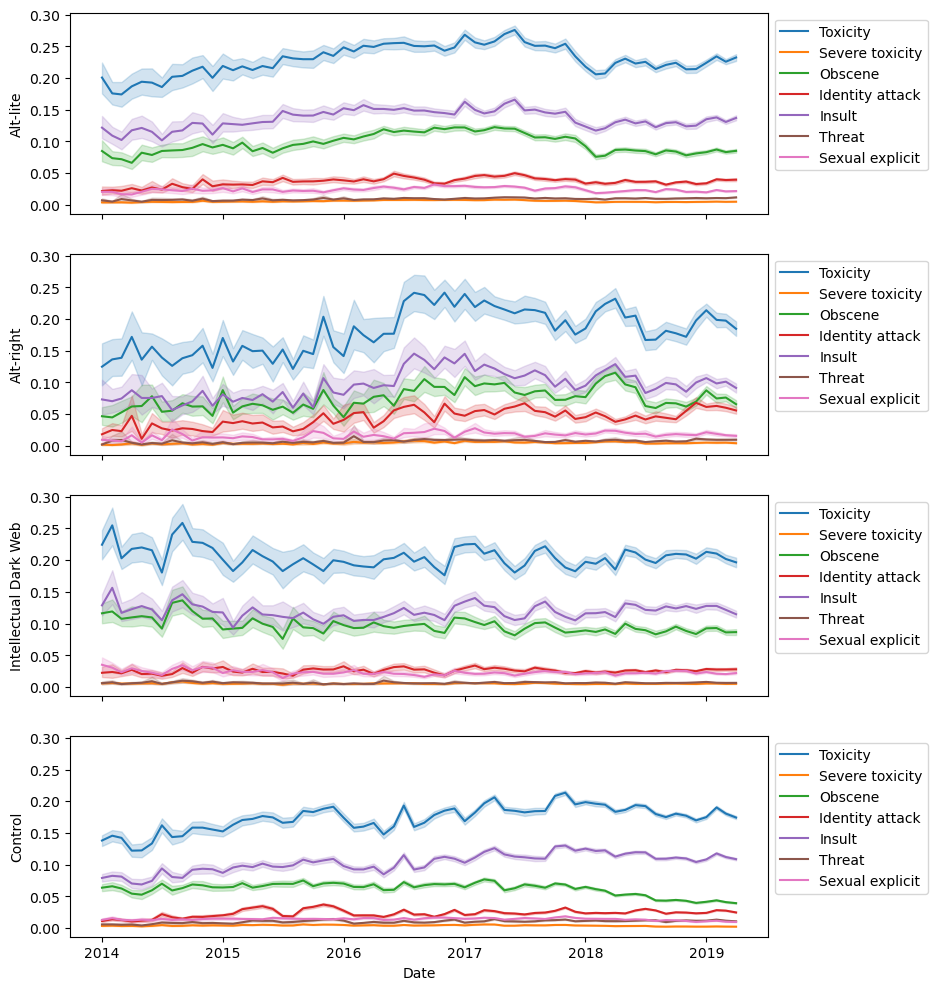

In [47]:
fig, axs = plt.subplots(4,1, figsize=(9,12), sharex=True, sharey=True)

for i, category in enumerate(list_categories):
    for j, subcat in enumerate(list_all_tox):
        sns.lineplot(x="month_created", y=subcat, data=df_after2014[df_after2014['Category'] == category],
            label=list_all_tox_titles[j], ax = axs[i])
    axs[i].set_ylabel(list_categories[i])
    axs[i].set_xlabel("Date")
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))

Overall the 4 channel-categories, the three main subcategories of toxicity that are signifcant are toxicity, insult and obscene.
* Alt-lite: we see a small increase of the three main subcategories mentionned above, until 2018, where a drop is observed. The values might have dropped because of the #Metoo movement, starting in 2017 as a way to draw attention on the magnitude against sexual abuse and harassment. Then the values are quite stable.
* Alt-right: an steep increase is observed mid 2016 in toxicity, insult, obscene. It coincides with the election of Donald Trump in the U.S. Indeed, June 2015, he announced that he would be a candidate in the U.S presidential election of 2016. In November 2016, he won the election. Also youtube didn't moderate the comments, following the Russian interference in the 2016 U.S. elections. We also see a pick in the first quarter of 2018. 
* IDW: rather constant.
* control: a very light increase of toxicity and insult since 2014. A decrease of obscene from 2018.

Link the behaviours to events, see hateful events of the last decade in https://www.adl.org/resources/report/decades-top-10-incidents-hate 

october 2018: Pittsburgh synagogue shooting is deadliest attack on Jews in U.S. history

## Study of the top 25 videos per channel-category

In [52]:
list_dates = df_after2014.month_created.unique()

In [60]:
# create the dataframe:
df_top25 = pd.DataFrame()

for i, category in enumerate(list_categories):
    df_category=df_after2014.loc[df_after2014['Category'] == category]
    for j, date in enumerate(list_dates):
        df = df_category.loc[df_category['month_created'] == date]
        if i==0 and j==0:
            df_top25 = df.sort_values('view_count', ascending=False).head(25)
        else:
            df_top25 = pd.concat([df_top25, df.sort_values('view_count', ascending=False).head(25)])
            
df_top25.head()

,Unnamed: 0,video_map,view_count,upload_date,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,channel_id,Category,log_view_count,month_created
353981,353981,1740,1576945.0,2019-04-09,0.468324,0.015470,0.188483,0.044535,0.368183,0.011007,0.053631,UCfDdlNLRVb1h3_7Xh-WhL3w,Alt-lite,14.271000,2019-04-01
382201,14202,2,1522217.0,2019-04-17,0.166405,0.003421,0.074628,0.012072,0.093572,0.008610,0.015407,UCIveFvW-ARp_B_RckhweNJw,Alt-lite,14.235678,2019-04-01
383047,15048,864,1510454.0,2019-04-27,0.225381,0.008980,0.138781,0.012772,0.124045,0.005274,0.025489,UCIveFvW-ARp_B_RckhweNJw,Alt-lite,14.227921,2019-04-01
382205,14206,6,893872.0,2019-04-09,0.289346,0.007501,0.148155,0.030205,0.138088,0.009886,0.067526,UCIveFvW-ARp_B_RckhweNJw,Alt-lite,13.703318,2019-04-01
349821,349821,435,811754.0,2019-04-07,0.386358,0.009342,0.125341,0.045635,0.293371,0.007277,0.029360,UCittVh8imKanO_5KohzDbpg,Alt-lite,13.606953,2019-04-01


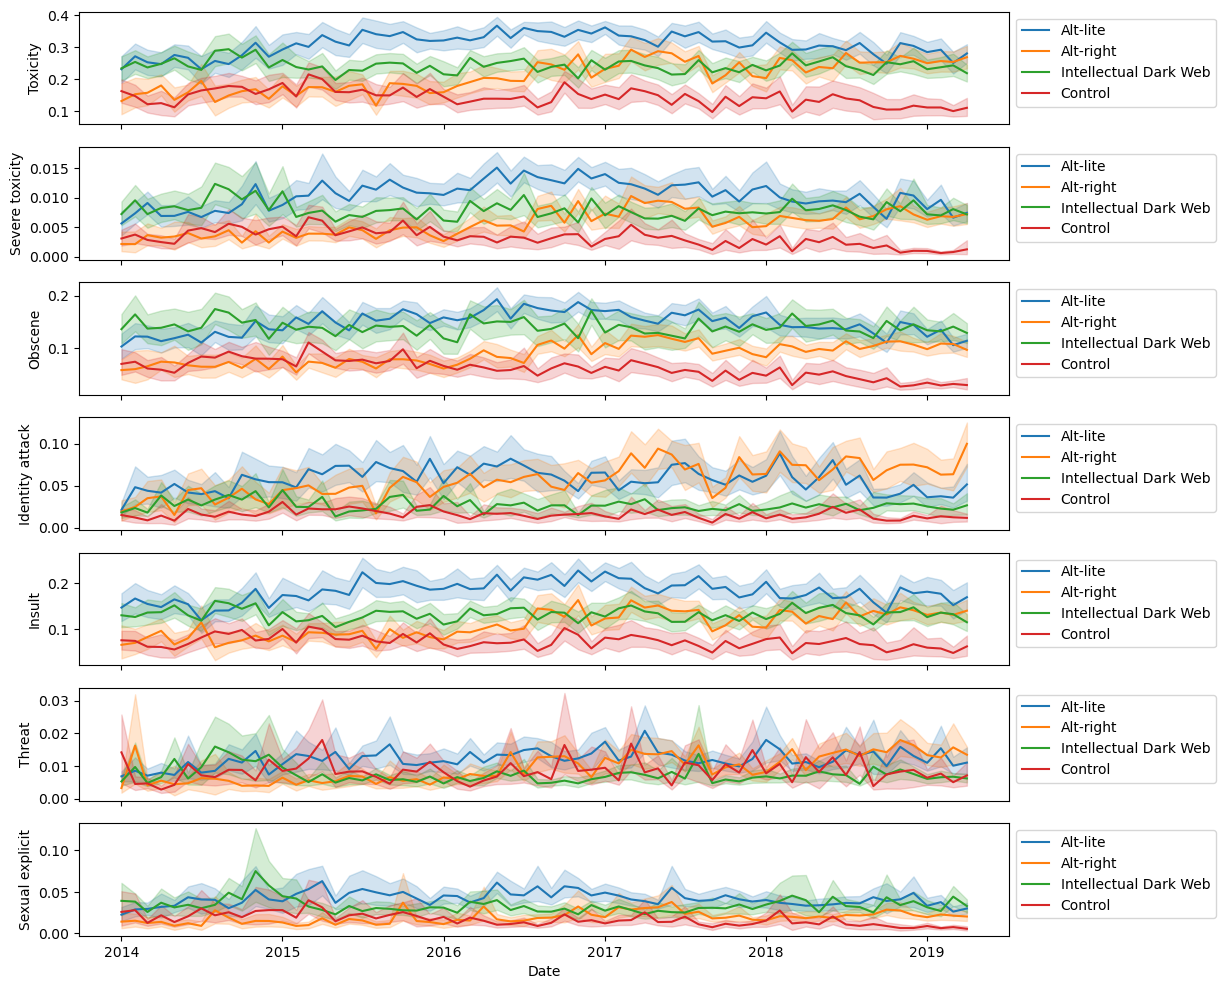

In [61]:
# prints the categories of toxicity over time. 

fig, axs = plt.subplots(7,1, figsize=(12,12), sharex=True)

for index, subcat in enumerate(list_all_tox):
    for category in list_categories:
        sns.lineplot(x="month_created", y=subcat, data=df_top25[df_top25['Category'] == category],
            label=category, ax = axs[index])
    axs[index].set_ylabel(list_all_tox_titles[index])
    axs[index].set_xlabel("Date")
    sns.move_legend(axs[index], "upper left", bbox_to_anchor=(1, 1))

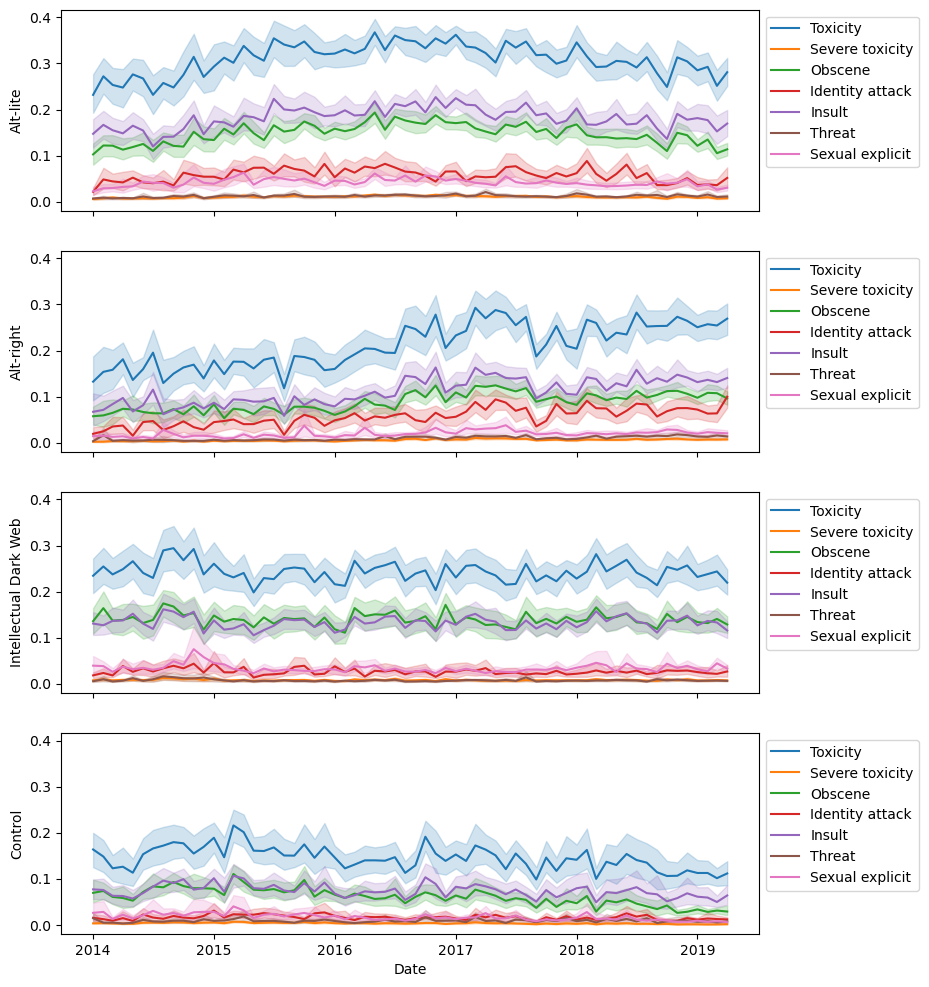

In [62]:
# prints the subcategories of toxicity per channel-category
fig, axs = plt.subplots(4,1, figsize=(9,12), sharex=True, sharey=True)

for i, category in enumerate(list_categories):
    for j, subcat in enumerate(list_all_tox):
        sns.lineplot(x="month_created", y=subcat, data=df_top25[df_top25['Category'] == category],
            label=list_all_tox_titles[j], ax = axs[i])
    axs[i].set_ylabel(list_categories[i])
    axs[i].set_xlabel("Date")
    sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))